In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import gensim
import sklearn
"""
from gensim import corpora, models, similarities
from gensim.utils import smart_open, simple_preprocess
from gensim.matutils import corpus2csc
from gensim.parsing.preprocessing import STOPWORDS
"""
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
print "Numpy version: ", np.__version__
print "Pandas version: ", pd.__version__
print "Matplotlib version: ", plt.matplotlib.__version__
print "Seaborn version: ", sns.__version__
print "Sklearn version: ", sklearn.__version__
print "NLTK version: ", nltk.__version__
print "Gensim version: ", gensim.__version__
print "PyLDAvis version: ", pyLDAvis.__version__

Numpy version:  1.11.2
Pandas version:  0.19.0
Matplotlib version:  1.5.3
Seaborn version:  0.7.1
Sklearn version:  0.18
NLTK version:  3.2.1
Gensim version:  0.12.4
PyLDAvis version:  2.0.0


## NLTK checks

More details at: http://www.nltk.org/

In [4]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /homed/smishra8/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [5]:
from nltk.corpus import movie_reviews

In [6]:
movie_reviews.categories()

[u'neg', u'pos']

In [7]:
movie_reviews.words()

[u'plot', u':', u'two', u'teen', u'couples', u'go', ...]

In [8]:
sents = movie_reviews.sents()

In [9]:
len(sents)

71532

In [10]:
sents[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [11]:
for i, s in enumerate(sents[:10]):
    print "S[%s]:\t%s" % (i, " ".join(s))

S[0]:	plot : two teen couples go to a church party , drink and then drive .
S[1]:	they get into an accident .
S[2]:	one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .
S[3]:	what ' s the deal ?
S[4]:	watch the movie and " sorta " find out .
S[5]:	.
S[6]:	.
S[7]:	critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .
S[8]:	which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly .
S[9]:	they seem to have taken this pretty neat concept , but executed it terribly .


## Gensim checks
More details at: https://radimrehurek.com/gensim/

In [12]:
bigrams = gensim.models.Phrases(sents[:100])

In [13]:
bigrams.vocab.items()[0:10]

[('of_making', 1),
 ('and_most', 1),
 ('mir_)', 1),
 ('keeping_score', 1),
 ('"_into', 1),
 ('before_it', 1),
 ('the_tale', 1),
 ('they_are', 4),
 ('i_checked', 1),
 ('poorly', 2)]

In [14]:
sorted(bigrams.vocab.iteritems(), key=lambda x: x[1], reverse=True)[:10]

[(',', 116),
 ('the', 112),
 ('.', 86),
 ("'", 67),
 ('and', 50),
 ('a', 47),
 ('of', 46),
 ('it', 45),
 ("'_s", 40),
 ('s', 40)]

In [15]:
word_frequencies = map(lambda x: x[1], bigrams.vocab.iteritems())

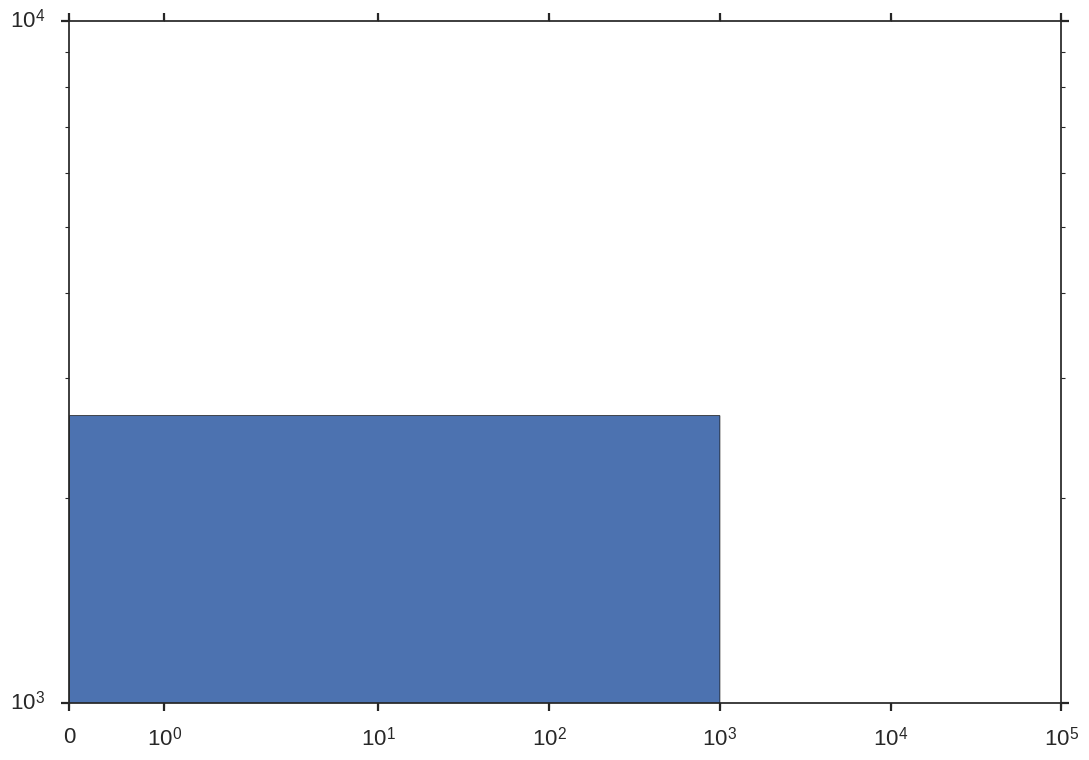

In [16]:
plt.hist(word_frequencies, bins=range(0,70000, 1000), log=True)
plt.xscale("symlog")

In [17]:
sorted(filter(lambda x: isinstance(x[0], str) and "_" in x[0], 
        bigrams.vocab.iteritems()), key=lambda x: x[1], reverse=True)[:30]

[("'_s", 40),
 ("'_t", 16),
 (',_and', 13),
 (',_but', 11),
 ("it_'", 10),
 ('the_film', 9),
 ('there_are', 9),
 ('that_the', 8),
 ('of_the', 8),
 ('/_10', 8),
 ('10_)', 8),
 (',_it', 8),
 (')_-', 7),
 ("don_'", 7),
 (',_there', 6),
 (')_,', 6),
 ('with_the', 6),
 (',_the', 6),
 ('film_is', 6),
 ('and_the', 5),
 ('for_the', 5),
 ('they_are', 4),
 ('the_movie', 4),
 ('the_characters', 4),
 ('in_a', 4),
 ('this_film', 4),
 ('on_the', 4),
 (',_as', 4),
 ('most_of', 4),
 ('of_a', 4)]

In [18]:
corpus = bigrams[sents[:100]]
id2word = gensim.corpora.Dictionary(corpus)

In [19]:
len(id2word.keys())

804

In [20]:
corpus_processed = [id2word.doc2bow(k) for k in corpus]
print len(corpus_processed)

100


In [21]:
corpus_processed[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [22]:
corpus[0]

[u'plot',
 u':',
 u'two',
 u'teen',
 u'couples',
 u'go',
 u'to',
 u'a',
 u'church',
 u'party',
 u',',
 u'drink',
 u'and',
 u'then',
 u'drive',
 u'.']

In [23]:
LDA_model = gensim.models.ldamodel.LdaModel(corpus_processed, num_topics=10, id2word=id2word)

In [24]:
LDA_model.print_topics()

[(0,
  u"0.072*the + 0.028*is + 0.026*that + 0.024*of + 0.024*. + 0.022*to + 0.020*'_s + 0.015*with + 0.013*( + 0.013*it"),
 (1,
  u"0.065*, + 0.045*the + 0.030*. + 0.025*and + 0.023*a + 0.019*'_s + 0.017*that + 0.016*of + 0.015*is + 0.015*it"),
 (2,
  u"0.036*the + 0.027*it + 0.024*, + 0.024*and + 0.019*of + 0.019*. + 0.017*that + 0.017*'_s + 0.011*- + 0.010*is"),
 (3,
  u'0.043*, + 0.041*" + 0.022*\'_s + 0.020*( + 0.019*. + 0.019*the + 0.018*- + 0.014*/_10 + 0.014*) + 0.011*to'),
 (4,
  u'0.034*, + 0.033*. + 0.025*a + 0.025*it + 0.025*the + 0.017*and + 0.013*to + 0.012*on + 0.012*that + 0.011*movie'),
 (5,
  u'0.029*, + 0.025*the + 0.023*of + 0.020*) + 0.019*. + 0.014*it + 0.014*( + 0.013*a + 0.013*/_10 + 0.012*-'),
 (6,
  u'0.061*, + 0.026*there_are + 0.024*it + 0.024*. + 0.018*of + 0.017*the + 0.017*to + 0.017*and + 0.016*is + 0.015*this'),
 (7,
  u'0.038*. + 0.014*, + 0.012*and + 0.012*go + 0.011*my + 0.011*are + 0.010*they + 0.010*) + 0.010*i + 0.009*rest'),
 (8,
  u'0.040*the + 

In [25]:
LDA_model.get_document_topics(corpus_processed[0])

[(4, 0.94705311552938121)]

In [26]:
doc_topics = LDA_model[corpus_processed]

In [27]:
doc_topics[1]

[(0, 0.014287176425056468),
 (1, 0.01428779366006),
 (2, 0.014286628560848513),
 (3, 0.014286642126148443),
 (4, 0.01428781334414557),
 (5, 0.014286538420971868),
 (6, 0.014286667359821193),
 (7, 0.014287527576404878),
 (8, 0.87141521301815794),
 (9, 0.014287999508385184)]

In [28]:
pyLDAvis.gensim.prepare(LDA_model, corpus_processed,
                        id2word)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      26.617384        1       1 -0.044051  0.018613
3      15.790489        1       2  0.116821 -0.026320
9      13.802637        1       3 -0.041292  0.034834
0      12.058572        1       4 -0.054585 -0.112657
4       9.148639        1       5 -0.009880  0.005724
6       8.567227        1       6 -0.029286  0.087576
2       5.376708        1       7 -0.026484 -0.019530
8       3.711320        1       8  0.016342 -0.031848
5       3.614280        1       9  0.002032  0.018450
7       1.312744        1      10  0.070384  0.025158, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
510   Default  64.000000           .  64.000000  30.0000  30.0000
594   Default  86.000000         the  86.000000  29.0000  29.0000
221   Default  92.000000           ,  92.000000  28.0000  28.0000
351   Default  36.000000         and  36.000000  27.0000  27.0000
311   Default  26.000000           "  26.000000  26.0000  26.0000
697   Default  34.000000          of  34.000000  25.0000  25.0000
559   Default  15.000000           )  15.000000  24.0000  24.0000
547   Default  33.000000          it  33.000000  23.0000  23.0000
791   Default   7.000000   there_are   7.000000  22.0000  22.0000
189   Default  36.000000           a  36.000000  21.0000  21.0000
287   Default   6.000000        /_10   6.000000  20.0000  20.0000
237   Default   8.000000        they   8.000000  19.0000  19.0000
454   Default   9.000000         are   9.000000  18.0000  18.0000
410   Default  17.000000           (  17.000000  17.0000  17.0000
763   Default   9.000000          as   9.000000  16.0000  16.0000
325   Default  28.000000        that  28.000000  15.0000  15.0000
762   Default   6.000000          an   6.000000  14.0000  14.0000
545   Default  29.000000          is  29.000000  13.0000  13.0000
586   Default   7.000000           i   7.000000  12.0000  12.0000
239   Default   6.000000         not   6.000000  11.0000  11.0000
678   Default   7.000000           ?   7.000000  10.0000  10.0000
458   Default  10.000000       movie  10.000000   9.0000   9.0000
15    Default  29.000000          to  29.000000   8.0000   8.0000
469   Default   6.000000          we   6.000000   7.0000   7.0000
623   Default  12.000000         '_t  12.000000   6.0000   6.0000
716   Default   7.000000         her   7.000000   5.0000   5.0000
367   Default  22.000000           -  22.000000   4.0000   4.0000
780   Default   5.000000      really   5.000000   3.0000   3.0000
5     Default   3.000000          go   3.000000   2.0000   2.0000
144   Default   2.000000          my   2.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
570   Topic10   0.276450        gets   1.661946   2.5393  -4.6727
144   Topic10   0.334853          my   2.530817   2.3104  -4.4810
159   Topic10   0.280392           !   2.489232   2.1495  -4.6585
5     Topic10   0.341608          go   3.094221   2.1294  -4.4611
560   Topic10   0.273815      things   2.590986   2.0857  -4.6823
32    Topic10   0.096304      entire   1.437535   1.6299  -5.7272
703   Topic10   0.091988         own   1.449886   1.5755  -5.7731
87    Topic10   0.086706       kudos   1.465004   1.5060  -5.8322
163   Topic10   0.075602       holds   1.496787   1.3475  -5.9692
206   Topic10   0.060860    executed   1.301479   1.2704  -6.1862
292   Topic10   0.057519    terribly   1.307428   1.2093  -6.2426
660   Topic10   0.063510  unraveling   1.531398   1.1503  -6.1435
1     Topic10   0.053222     concept   1.315080   1.1259  -6.3203
725   Topic10   0.085247     biggest   2.174719   1.0939  -5.8492
586   Topic10   0.294035           i   7.659021   1.0731  -4.6110
349   Topic10   0.058478     feeling   1.545802   1.0584  -6.2261
237   Topic10   0.302351        they   8.075684   1.0480  -4.5831
493   Top